# Álgebra Lineal

In [1]:
# %pylab inline
# from IPython.display import Image
# from IPython.display import HTML
import numpy as np
import matplotlib.pylab as plt

In [ ]:
help(np.linalg)

## Matrices en NumPy

In [14]:
A = np.zeros((3, 3))
B = np.eye(3)
C = np.random.rand(3, 3)
D = np.random.rand(3, 3)

for i in range(3):
    for j in range(3):
        A[i, j] = i*j
print(A)
# print(B)
print(C)
print(D)

print(np.dot(C, D), C @ D)
print(2 * D, C * D)

[[0. 0. 0.]
 [0. 1. 2.]
 [0. 2. 4.]]
[[0.94956648 0.21535831 0.13106458]
 [0.11198801 0.1421754  0.60893645]
 [0.34690686 0.79056813 0.26675026]]
[[0.79933325 0.02598844 0.7111853 ]
 [0.01324532 0.74904584 0.25523338]
 [0.90442829 0.67556887 0.54421147]]
[[0.88041107 0.27453414 0.8016112 ]
 [0.64213825 0.52078479 0.44732233]
 [0.529022   0.7813955  0.59366299]] [[0.88041107 0.27453414 0.8016112 ]
 [0.64213825 0.52078479 0.44732233]
 [0.529022   0.7813955  0.59366299]]
[[1.5986665  0.05197688 1.4223706 ]
 [0.02649064 1.49809168 0.51046677]
 [1.80885659 1.35113774 1.08842293]] [[0.75902006 0.00559683 0.0932112 ]
 [0.00148332 0.10649589 0.15542091]
 [0.31375238 0.53408321 0.14516855]]


Definición del producto de dos matrices

$$(AB)_{i,j}=\sum A_{i,k}B_{k,j}$$

## Ejemplo: matrices de Pauli

$$\sigma_x = \begin{bmatrix}0 & 1\\ 1 & 0 \end{bmatrix}, \quad \sigma_y = \begin{bmatrix}0 & -i\\ i & 0 \end{bmatrix}, \quad \sigma_z = \begin{bmatrix}1 & 0\\ 0 & -1 \end{bmatrix}$$

In [15]:
sigmax=np.array([[0,1],[1,0]])
sigmay=np.array([[0,-1j],[1j,0]])
sigmaz=np.array([[1,0],[0,-1]])
sigmas=[sigmax,sigmay,sigmaz]

sigmax, sigmay, sigmaz

(array([[0, 1],
        [1, 0]]),
 array([[ 0.+0.j, -0.-1.j],
        [ 0.+1.j,  0.+0.j]]),
 array([[ 1,  0],
        [ 0, -1]]))

"The matrices are involutory:..."

In [16]:
for pauli in sigmas:
    print("*"*20)
    print(pauli*pauli)
    print("*"*20)

********************
[[0 1]
 [1 0]]
********************
********************
[[ 0.+0.j -1.+0.j]
 [-1.+0.j  0.+0.j]]
********************
********************
[[1 0]
 [0 1]]
********************


## Eigenvectors and Eigenvalues

Valores y vectores propios se calculan con la función **eig**.

In [18]:
for i in range(3):
    print("*"*22,"σ"+["x","y","z"][i],"*"*22)
    print(np.linalg.eig(sigmas[i]))
    print("*"*48)

********************** σx **********************
(array([ 1., -1.]), array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]]))
************************************************
********************** σy **********************
(array([ 1.+0.j, -1.+0.j]), array([[-0.        -0.70710678j,  0.70710678+0.j        ],
       [ 0.70710678+0.j        ,  0.        -0.70710678j]]))
************************************************
********************** σz **********************
(array([ 1., -1.]), array([[1., 0.],
       [0., 1.]]))
************************************************


In [21]:
np.linalg.eig(sigmax)

(array([ 1., -1.]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]))

In [26]:
lambda_1 = -1 
vector_1 = np.array([[-0.70710678], [0.70710678]])

print(sigmax)
sigmax @ vector_1  # sigma @ vector_1 = lambda_1 * vector_1

print(vector_1, vector_1.T)

[[0 1]
 [1 0]]
[[-0.70710678]
 [ 0.70710678]] [[-0.70710678  0.70710678]]


In [ ]:
help(np.linalg)

Los determinantes se calculan con la función **det** que admite matrices o arrays cuadrados

In [27]:
for pauli in sigmas:
    print(np.linalg.det(pauli))

-1.0
(-1+0j)
-1.0


La traza se calcula con la función **trace**

In [28]:
for pauli in sigmas:
    print(np.trace(pauli))

0
0j
0


## Ejemplo: Density Matrices

Density Matrices are Hermitian, Trace 1, and Positive Definite

$$\rho = \frac{1}{4}\begin{bmatrix}
2 & 1 & 1\\
1 & 1 & 0\\
1 & 0 & 1 
\end{bmatrix}$$

In [29]:
rho = (0.25)*np.array([[2, 1, 1],[1, 1, 0],[1, 0, 1]])

rho

array([[0.5 , 0.25, 0.25],
       [0.25, 0.25, 0.  ],
       [0.25, 0.  , 0.25]])

In [30]:
D, U = np.linalg.eig(rho)

D

array([ 7.5000000e-01, -7.2858386e-17,  2.5000000e-01])

In [31]:
U

array([[-8.16496581e-01, -5.77350269e-01, -1.57009246e-16],
       [-4.08248290e-01,  5.77350269e-01, -7.07106781e-01],
       [-4.08248290e-01,  5.77350269e-01,  7.07106781e-01]])

In [32]:
rho @ U[:, 0], D[0] * U[:, 0]

(array([-0.61237244, -0.30618622, -0.30618622]),
 array([-0.61237244, -0.30618622, -0.30618622]))

Unitary Matrix

$$ UU^{\text{T}}=I$$

In [33]:
U @ U.T

array([[ 1.00000000e+00,  1.11022302e-16, -1.11022302e-16],
       [ 1.11022302e-16,  1.00000000e+00,  0.00000000e+00],
       [-1.11022302e-16,  0.00000000e+00,  1.00000000e+00]])

Spectral Decomposition

$$ \rho = UDU^{\text{T}}$$

In [34]:
U @ np.diag(D) @ U.T

array([[ 5.00000000e-01,  2.50000000e-01,  2.50000000e-01],
       [ 2.50000000e-01,  2.50000000e-01, -4.16333634e-17],
       [ 2.50000000e-01, -6.93889390e-17,  2.50000000e-01]])

## Solución de sistemas de ecuaciones lineales

Para resolver sistemas de ecuaciones lineales usar la función **solve**.

$$A\vec{b}=\vec{c} \rightarrow \vec{b}=A^{-1}\vec{c}$$

$$ 3x_1 - 7x_2 + 4x_3 = 10 $$
$$ 1x_1 - 2x_2 + x_3 = 3 $$
$$ 2x_1 - 1x_2 - 2x_3 = 6 $$

$$\begin{bmatrix}
3 & -7 & 4\\
1 & -2 & 1\\
2 & -1 & -2 
\end{bmatrix}\begin{bmatrix}
x_1\\
x_2\\
x_3\end{bmatrix} = \begin{bmatrix}
10\\
3\\
6\end{bmatrix} $$

In [40]:
A = np.array([[3,-7,4],[1,-2,1],[2,-1,-2]])
c = np.array([10, 3, 6])

b = np.linalg.solve(A, c)
print("Verificar solucion")
print(b)
print(A @ b)

Verificar solucion
[-2. -4. -3.]
[10.  3.  6.]


También podría usarse la inversión de matrices que se puede llevar a cabo con la función **inv**.

In [41]:
np.linalg.inv(A)*np.transpose(np.matrix([[10,3,6]]))

matrix([[-2.],
        [-4.],
        [-3.]])

In [42]:
np.linalg.inv(A)

array([[-5., 18., -1.],
       [-4., 14., -1.],
       [-3., 11., -1.]])

## Otros

La función **eye** sirve para producir un "array identidad".

In [ ]:
identidad=np.matrix(np.eye(10))
print(identidad)

La función **diag** se puede utilizar para tomar la diagonal de un array o bandas.

In [ ]:
ma=np.diag(range(10))
print(ma)

In [ ]:
# Recuperar la diagonal
np.diag(ma)

In [ ]:
# Usar una diagonal distinta a la principal
np.diag(range(10),k=1)

In [ ]:
ma=np.zeros((10,10))
# La función transpose puede utilizarse para transponer arrays o matrices.
for i in range(10):
    ma+=np.diag(range(10-i),k=i)+np.transpose(np.diag(range(10-i),k=i))
plt.figure()
plt.imshow(ma,interpolation='none')
plt.show()

## Exercise

Dados tres puntos en el plano cartesiano, encuentre la ecuación (como un string) del circulo que pasa exactamente por esos tres puntos. 

$$ (x-x_0)^2+(y-y_0)^2=r^2 $$

In [43]:
import numpy as np

data1 = "(9,8),(9,4),(3,6)"
data2 = "(7,3),(9,6),(3,6)"

def circle(data):
    
    x_1, y_1 = int(data[1]), int(data[3])
    x_2, y_2 = int(data[7]), int(data[9])
    x_3, y_3 = int(data[13]), int(data[15])
    
    A = np.array([ [x_1,y_1,1], [x_2,y_2,1], [x_3,y_3,1] ])
    B = np.array([-(x_1**2+y_1**2), -(x_2**2+y_2**2), -(x_3**2+y_3**2)])
    
    C = np.linalg.solve(A,B)
    
    x_0, y_0, r = -(C[0])/2, -(C[1])/2, np.sqrt((-(C[0])/2)**2+(-(C[1])/2)**2-C[2])
    x_0, y_0, r = round(x_0,2), round(y_0,2), round(r,2)
    x_0, y_0, r = '%g'%(x_0), '%g'%(y_0), '%g'%(r) 

    return "(x-"+ x_0 + ")^2+(y-" + y_0 + ")^2=" + r + "^2"

In [44]:
circle("(9,8),(9,4),(3,6)")

'(x-6.33)^2+(y-6)^2=3.33^2'

In [45]:
def circle_params(data):
    
    x_1, y_1 = int(data[1]), int(data[3])
    x_2, y_2 = int(data[7]), int(data[9])
    x_3, y_3 = int(data[13]), int(data[15])
    
    A = np.array([ [x_1,y_1,1], [x_2,y_2,1], [x_3,y_3,1] ])
    B = np.array([-(x_1**2+y_1**2), -(x_2**2+y_2**2), -(x_3**2+y_3**2)])
    
    C = np.linalg.solve(A,B)
    
    x_0, y_0, r = -(C[0])/2, -(C[1])/2, np.sqrt((-(C[0])/2)**2+(-(C[1])/2)**2-C[2])
    x_0, y_0, r = round(x_0,2), round(y_0,2), round(r,2)
    #x_0, y_0, r = '%g'%(x_0), '%g'%(y_0), '%g'%(r) 

    return x_0, y_0, r

In [46]:
x_0, y_0, r = circle_params("(9,8),(9,4),(3,6)")

print(x_0, y_0, r )

6.33 6.0 3.33


In [47]:
data = "(9,8),(9,4),(3,6)"
x_1, y_1 = int(data[1]), int(data[3])
x_2, y_2 = int(data[7]), int(data[9])
x_3, y_3 = int(data[13]), int(data[15])

x = [x_1, x_2, x_3]
y = [y_1, y_2, y_3]

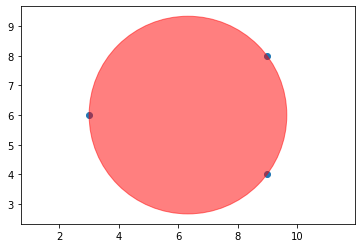

In [48]:
import matplotlib.pyplot as plt

# taken from https://stackoverflow.com/questions/9215658/plot-a-circle-with-pyplot

fig, ax = plt.subplots()
ax.add_patch(plt.Circle((x_0, y_0), r, color='r', alpha=0.5))
ax.scatter(x, y)

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.show()